In [2]:
#import json
import pandas as pd

In [3]:
psycho_path = 'data/Q_R_Psycho.csv'
psycho_list = pd.read_csv(psycho_path,sep=';',names=['Question','Reponse'])
psycho_frame = pd.DataFrame(psycho_list,columns=['Question','Reponse'])

In [4]:
# data analyse

In [5]:
psycho_frame.sample(5)

,Question,Reponse
2,Quelles sont les différences entre LOC et attr...,Tout d'abord le LOC (Locus of Control) corresp...
20,Comment faire si je suis de nature anxieuse ?,L'anxiété si elle devient chronique peut-être ...
10,Pourquoi je n'arrive pas à oublier mon ex comp...,Dans une relation à deux et quand il y a un pe...
0,Quelles sont les différences entre psychologie...,Si la psychologie sociale étudie l’individu en...
30,Comment faire comprendre à mon mari qu'il a un...,Je vous conseille d'emmener votre mari en cons...


In [6]:
psycho_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  40 non-null     object
 1   Reponse   40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


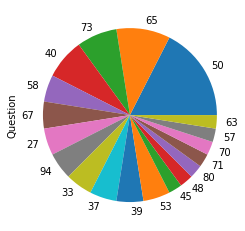

In [7]:
psycho_frame.Question.apply(lambda x: len(str(x))).value_counts().plot(kind='pie')

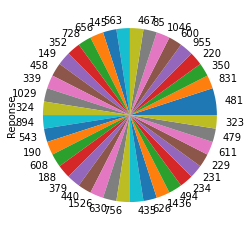

In [8]:
psycho_frame.Reponse.apply(lambda x: len(str(x))).value_counts().plot(kind='pie')

In [9]:
psycho_frame.Question.apply(lambda x:len(str(x))).describe()

count    40.00000
mean     54.97500
std      16.48385
min      27.00000
25%      40.00000
50%      51.50000
75%      65.50000
max      94.00000
Name: Question, dtype: float64

In [10]:
psycho_frame.Reponse.apply(lambda x:len(str(x))).describe()

count      40.000000
mean      537.775000
std       328.356786
min        85.000000
25%       323.750000
50%       480.000000
75%       636.500000
max      1526.000000
Name: Reponse, dtype: float64

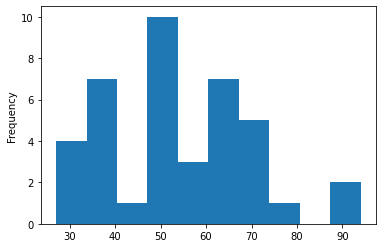

In [11]:
psycho_frame.Question.apply(lambda x: len(str(x))).plot(kind='hist')

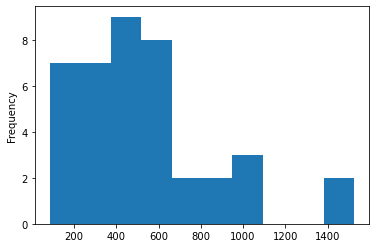

In [12]:
psycho_frame.Reponse.apply(lambda x: len(str(x))).plot(kind='hist')

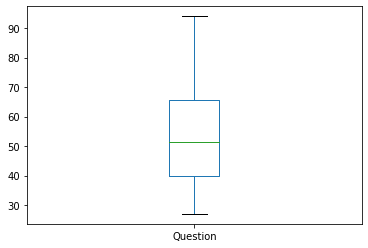

In [13]:
psycho_frame.Question.apply(lambda x: len(str(x))).plot(kind='box')

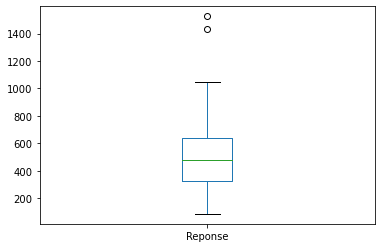

In [14]:
psycho_frame.Reponse.apply(lambda x: len(str(x))).plot(kind='box')

In [15]:
# data processe

In [23]:
import re
import nltk
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.lancaster import LancasterStemmer

In [24]:
question_list = psycho_frame['Question'].to_list()

In [25]:
response_list = psycho_frame['Reponse'].to_list()

In [26]:
for question in question_list:
    token = nltk.word_tokenize(question)
    token_tag = nltk.pos_tag(token)
    print(token_tag)

[('Quelles', 'NNS'), ('sont', 'VBP'), ('les', 'NNS'), ('différences', 'NNS'), ('entre', 'VBP'), ('psychologie-sociale', 'JJ'), ('et', 'NN'), ('sociologie', 'NN'), ('?', '.')]
[('Quelles', 'NNS'), ('sont', 'VBP'), ('les', 'NNS'), ('différences', 'NNS'), ('entre', 'VBP'), ('psychologie-sociale', 'JJ'), ('et', 'NN'), ('psychologie', 'NN'), ('générale', 'NN'), ('?', '.')]
[('Quelles', 'NNS'), ('sont', 'VBP'), ('les', 'NNS'), ('différences', 'NNS'), ('entre', 'VBP'), ('LOC', 'NNP'), ('et', 'CC'), ('attribution', 'NN'), ('causale', 'NN'), ('?', '.')]
[("Qu'est-ce", 'JJ'), ('que', 'NN'), ('je', 'NN'), ('pourrais', 'NN'), ('faire', 'NN'), ('quand', 'NN'), ('ma', 'NN'), ('compagne', 'NN'), ('m', 'NN'), ("'", "''"), ('a', 'DT'), ('quittée', 'JJ'), ('après', 'NN'), ('10', 'CD'), ('années', 'NN'), ('de', 'FW'), ('vie', 'FW'), ('commune', 'NN'), ('?', '.')]
[("Qu'est-ce", 'JJ'), ('que', 'NN'), ('je', 'NN'), ('pourrais', 'NN'), ('faire', 'NN'), ('quand', 'NN'), ('ma', 'NN'), ('compagne', 'NN'), ('m'

In [27]:
def clean(sentence):
    word_token = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(w) for w in word_token]
    return ' '.join(stemmed_words)

In [28]:
def get_word_weight(content):
    # word to matrix
    vectorizer=CountVectorizer()
    # word weight
    transformer=TfidfTransformer()
    tfidf=transformer.fit_transform(vectorizer.fit_transform(content))
    word=vectorizer.get_feature_names()
    weight=tfidf.toarray()
    dic_word_weight = {}
    for i in range(len(weight)):
        #print('----------le word weight sur le',i+1,'er content---------')
        for j in range(len(word)):
            print (word[j],weight[i][j])
        dic_word_weight[i] = [word[j],weight[i][j]]
    return dic_word_weight

In [29]:
# word weight pour la question
#question_clean = []
#stemmer = LancasterStemmer()
for question in question_list:
    print("*"*20)
    #q_c = clean(question)
    #question_clean.append(q_c)
    question_word_weight = get_word_weight(question)


********************


ValueError: Iterable over raw text documents expected, string object received.

In [30]:
#reponse_word_weight = get_word_weight(response_list)

In [31]:
def clean(sentence):
    word_token = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(w) for w in word_token]
    return ' '.join(stemmed_words)

Bonjour, je suis bébé de maman Shanshan et papa Cancan, je peux parler français, chinois et anglais, qu'est-ce que je peux vous aider?



In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import DistanceMetric

# obtenir une matrix de distance sur la question et la réponse
def get_distance(query,liste):
    matrix = [ [1]*len(liste) for i in range(len(liste))]
    #print(matrix)
    dist = DistanceMetric.get_metric('jaccard')
    for i in range(len(liste)):
        V = CountVectorizer()
        X = V.fit_transform([query, liste[i]]).toarray()
        distance = dist.pairwise(X)
        distance = distance.tolist()
        #distance = distance[1][0]
        matrix[i] = distance
    return matrix



In [48]:
# bot
print("BOT : Bonjour, je suis bébé de maman Shanshan et papa Cancan, je peux parler français, chinois et anglais, qu'est-ce que je peux vous aider?")

seuil = 0.2

#query = 'psychologie'
while True:
    query = input()
    print('You: ',query)
    if not 'Bye' in query:
        distance_query_question = get_distance(query,question_list)
        distance_query_reponse = get_distance(query,response_list)
        #min_q = float(min(distance_query_question))
        #min_r = float(min(distance_query_reponse))
        #if  min_q > seuil and min_r > seuil:
        if min(distance_query_question) < min(distance_query_reponse): 
            question_simi_index = distance_query_question.index(min(distance_query_question))
            reponse = response_list[question_simi_index]
            print("BOT : ",reponse)
        else:
            reponse_simi_index = distance_query_reponse.index(min(distance_query_reponse))
            response = response_list[reponse_simi_index]
            print("BOT : ",reponse)
        #else:
            #print('BOT: Je ne sais pas comment répondre cette question, est-ce que vous pouvez reformuler votre question ?')
    else:
        print('BOT: Au revoir')
        break


BOT : Bonjour, je suis bébé de maman Shanshan et papa Cancan, je peux parler français, chinois et anglais, qu'est-ce que je peux vous aider?
You:  Acoustique
BOT :  L'anxiété si elle devient chronique peut-être une véritable torture au quotidien. Pour vous détendre, vous pouvez essayer la relaxation (respiration, massage, méditation), écouter de la musique, pratiquer une activité sportive, vous balader en pleine nature, changer le décor de votre intérieur. Vous pouvez aussi faire des séances de psychotherapie qui vous permettront de comprendre l'origine de vos angoisses, comment faire jaillir vos émotions et trouver des solutions pour retrouver un mieux-être, c'est a-dire de retrouver le goût à la vie, le plaisir de faire des activités, de prendre du temps pour soi.
You:  Bye
BOT: Au revoir


In [125]:
question_simi_index

0